In [1]:
import numpy as np
import pandas as pd
# Warnings
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
def avg_1(df,day,day_avg,col_name):
    city_day_ahm_copy=df
    city_day_ahm_copy=df.dropna(axis=0, how="all", subset=[col_name])
    count = 0
    value = 0
    four_day_avg = []
    for i in range(len(list(city_day_ahm_copy['Day']))):
        if day==(list(city_day_ahm_copy['Day']))[i]:
            count = count + 1 
            value = value + list(city_day_ahm_copy[col_name])[i]
        if count==day_avg:
            four_day_avg.append(value/day_avg)
            count=0
            value=0
    return four_day_avg

In [3]:
def replace_nan(df,pollut,day_avg):
    for j in pollut:
        try:
            mon_avg = (avg_1(df,'Mon',day_avg,j))
            mon_avg1 = sum(mon_avg)/len(mon_avg)
            tue_avg = (avg_1(df,'Tue',day_avg,j))
            tue_avg1 = sum(tue_avg)/len(tue_avg)
            wed_avg = (avg_1(df,'Wed',day_avg,j))
            wed_avg1 = sum(wed_avg)/len(wed_avg)
            thurs_avg = (avg_1(df,'Thurs',day_avg,j))
            thurs_avg1 = sum(thurs_avg)/len(thurs_avg)
            fri_avg = (avg_1(df,'Fri',day_avg,j))
            fri_avg1 = sum(fri_avg)/len(fri_avg)
            sat_avg = (avg_1(df,'Sat',day_avg,j))
            sat_avg1 = sum(sat_avg)/len(sat_avg)
            sun_avg = (avg_1(df,'Sun',day_avg,j))
            sun_avg1 = sum(sun_avg)/len(sun_avg)
            city_day_ahm_copy = df
            for i in range(len(list(city_day_ahm_copy[j]))):
                if math.isnan(list(city_day_ahm_copy[j])[i]):
                    if list(city_day_ahm_copy['Day'])[i]=='Mon':
                        try:
                            df[j][i] = mon_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = mon_avg1                    
                    if list(city_day_ahm_copy['Day'])[i]=='Tue':
                        try:
                            df[j][i] = tue_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = tue_avg1                    
                    if list(city_day_ahm_copy['Day'])[i]=='Wed':
                        try:
                            df[j][i] = wed_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = wed_avg1                    
                    if list(city_day_ahm_copy['Day'])[i]=='Thurs':
                        try:
                            df[j][i] = thurs_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = thurs_avg1                    
                    if list(city_day_ahm_copy['Day'])[i]=='Fri':
                        try:
                            df[j][i] = fri_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = fri_avg1                    
                    if list(city_day_ahm_copy['Day'])[i]=='Sat':
                        try:
                            df[j][i] = sat_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = sat_avg1                    
                    if list(city_day_ahm_copy['Day'])[i]=='Sun':
                        try:
                            df[j][i] = sun_avg[int(i/day_avg)]
                        except IndexError:
                            df[j][i] = sun_avg1  
        except ZeroDivisionError:
            print(j)
    return df

In [4]:
city_day = pd.read_csv("city_day.csv")

In [5]:
city_day['Date'] =  pd.to_datetime(city_day['Date'],format='%Y-%m-%d')

In [6]:
year = city_day['Date'].dt.year
month = city_day['Date'].dt.month
day = city_day['Date'].dt.day

In [7]:
city_day.insert(loc=1, column='Year', value= year)
city_day.insert(loc=2, column='Month', value= month)
city_day.insert(loc=3, column='Date1', value= day)

In [8]:
n_city = set(list(city_day["City"]))

In [9]:
n_city1 = city_day.City.unique()

In [10]:
n_city1 = set(n_city1)

In [11]:
n_city1

{'Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram'}

In [12]:
b = ["Thurs","Fri","Sat","Sun","Mon","Tue","Wed"]
c = len(list(city_day["NO2"]))
a = b * int(c/7) + b[:( c % 7 )] 

In [13]:
city_day["Day"] = a

In [14]:
pollutants= ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

In [15]:
df2 = pd.DataFrame({},columns=[])
for i in n_city1:
    print("Name of the city ",i)
    df1=replace_nan(city_day[city_day["City"]==i] ,pollutants,4)
    df2 = pd.concat([df2, df1], ignore_index=True, sort=False)

Name of the city  Ernakulam
O3
Name of the city  Delhi
Name of the city  Kochi
Benzene
Xylene
Name of the city  Hyderabad
Name of the city  Brajrajnagar
Toluene
Xylene
Name of the city  Chandigarh
Name of the city  Gurugram
Name of the city  Aizawl
Xylene
Name of the city  Thiruvananthapuram
Benzene
Toluene
Xylene
Name of the city  Guwahati
Toluene
Xylene
Name of the city  Ahmedabad
Name of the city  Kolkata
Name of the city  Amaravati
Name of the city  Amritsar
Name of the city  Mumbai
Name of the city  Bengaluru
Xylene
Name of the city  Lucknow
PM10
Xylene
Name of the city  Bhopal
Benzene
Toluene
Xylene
Name of the city  Jaipur
Xylene
Name of the city  Chennai
Xylene
Name of the city  Jorapokhar
NOx
Benzene
Toluene
Xylene
Name of the city  Shillong
Xylene
Name of the city  Patna
Name of the city  Talcher
Xylene


,City,Year,Month,Date1,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day
0,Ernakulam,2020,1,22,2020-01-22,37.48,80.65,127.81,7.76,135.57,101.97,1.94,3.34,NaN,0.64,1.01,0.12,NaN,NaN,Thurs
1,Ernakulam,2020,1,23,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fri
2,Ernakulam,2020,1,24,2020-01-24,41.13,68.71,125.76,7.95,133.71,102.66,1.12,3.46,NaN,0.68,1.87,0.31,NaN,NaN,Sat
3,Ernakulam,2020,1,25,2020-01-25,53.00,84.58,126.22,7.80,134.02,104.05,1.17,3.48,NaN,0.90,1.93,0.19,154.0,Moderate,Sun
4,Ernakulam,2020,1,26,2020-01-26,58.31,85.47,125.14,7.95,133.09,103.20,1.20,3.54,NaN,1.15,1.83,0.18,153.0,Moderate,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Talcher,2020,4,27,2020-04-27,NaN,21.56,7.03,20.77,26.60,3.19,2.07,NaN,59.90,0.00,NaN,NaN,108.0,Moderate,Tue
26215,Talcher,2020,4,28,2020-04-28,22.48,27.00,6.76,20.40,27.16,3.24,2.00,NaN,64.60,0.00,NaN,NaN,113.0,Moderate,Wed
26216,Talcher,2020,4,29,2020-04-29,43.23,7.90,17.31,19.15,47.00,4.99,2.43,NaN,59.04,0.00,NaN,NaN,113.0,Moderate,Thurs
26217,Talcher,2020,4,30,2020-04-30,15.28,34.63,9.29,19.29,28.58,3.37,1.95,NaN,59.27,0.00,NaN,NaN,119.0,Moderate,Fri


In [1]:
df2.isnull().sum()

NameError: name 'df2' is not defined

In [19]:
city_day_ahm = city_day[city_day["City"]=='Ahmedabad']

# Data Visualization

In [17]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decomposes
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 15, 6

In [20]:
df_date = city_day_ahm.set_index(['Date'],inplace=False)

In [21]:
df_date.head(2)

,City,Year,Month,Date1,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,2015,1,1,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,Thurs
2015-01-02,Ahmedabad,2015,1,2,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,Fri


In [33]:
# SO2

# Checking for stationarity

In [18]:
df = df_date["SO2"]

NameError: name 'df_date' is not defined

In [35]:
df.isnull().sum()

0

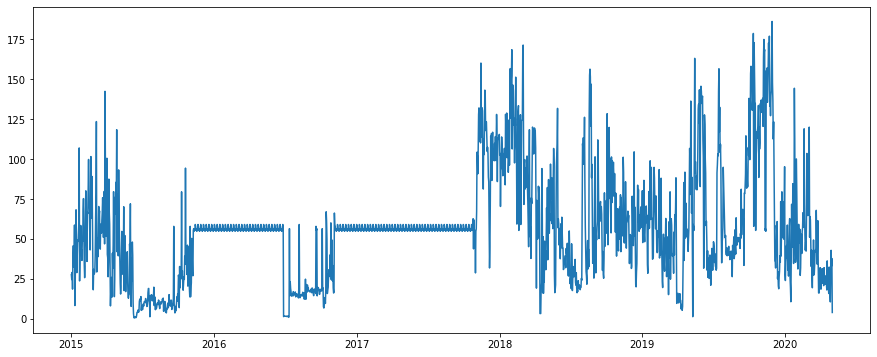

In [36]:
plt.plot(df)

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean=timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

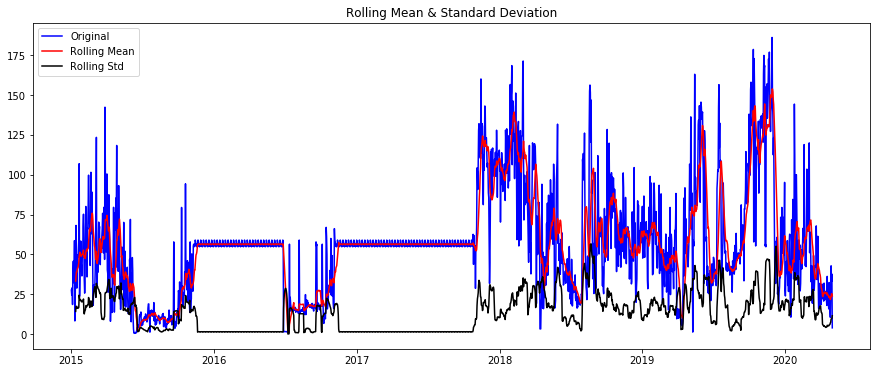

Results of Dickey-Fuller Test:
Test Statistic                   -3.896936
p-value                           0.002058
#Lags Used                       26.000000
Number of Observations Used    1921.000000
Critical Value (1%)              -3.433759
Critical Value (5%)              -2.863046
Critical Value (10%)             -2.567572
dtype: float64


In [38]:
test_stationarity(df)

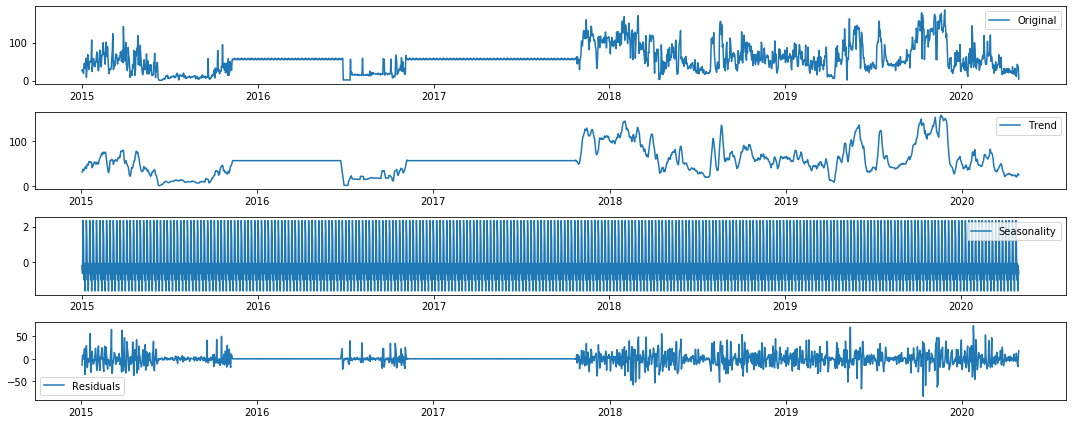

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

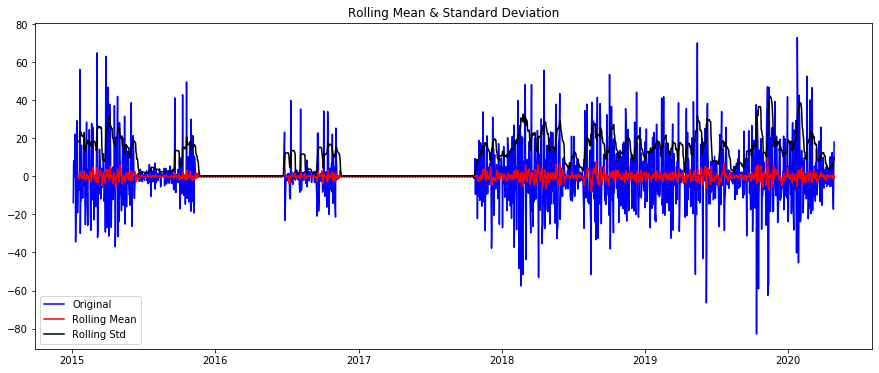

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [40]:
df_decompose = residual
# df_decompose.dropna(inplace=True)
test_stationarity(df_decompose)

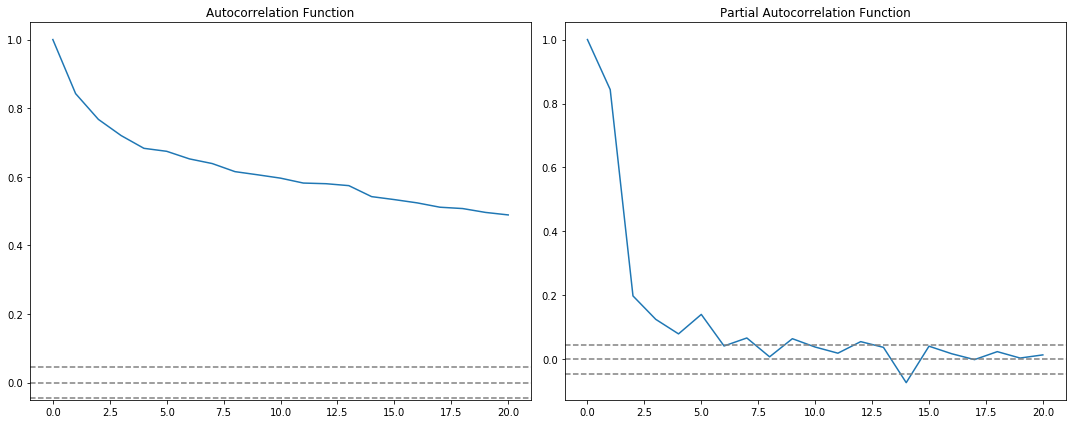

In [41]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(df, nlags=20)
lag_pacf = pacf(df, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
city_dam

In [ ]:
# Modelling

In [32]:
city_day_ahm

,City,Year,Month,Date1,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Day
0,Ahmedabad,2015,1,1,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,Thurs
1,Ahmedabad,2015,1,2,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,Fri
2,Ahmedabad,2015,1,3,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,Sat
3,Ahmedabad,2015,1,4,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,Sun
4,Ahmedabad,2015,1,5,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Ahmedabad,2020,4,27,2020-04-27,31.76,81.16,3.99,19.95,12.70,NaN,0.46,29.73,52.46,3.52,20.49,1.34,117.0,Moderate,Mon
1944,Ahmedabad,2020,4,28,2020-04-28,32.55,87.41,3.53,23.58,14.12,NaN,0.46,42.86,50.20,4.92,32.73,2.51,130.0,Moderate,Tue
1945,Ahmedabad,2020,4,29,2020-04-29,27.15,76.73,3.18,24.82,14.40,NaN,0.67,32.97,54.81,3.39,32.14,2.46,122.0,Moderate,Wed
1946,Ahmedabad,2020,4,30,2020-04-30,26.93,74.38,2.76,17.05,10.37,NaN,0.46,37.70,56.97,1.92,18.54,1.64,128.0,Moderate,Thurs


In [ ]:
X_train_df

In [ ]:
# from sklearn.linear_model import LinearRegression
# dtregressor=LinearRegression()
# dtregressor.fit(X_train,Y_train)

In [ ]:
# # from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# dtregressor=DecisionTreeRegressor()
dtregressor=  RandomForestRegressor()
dtregressor.fit(X_train,Y_train)

lock down announced on 24 march 2020

In [30]:
# city_day_pre = city_day[city_day.Date < '2020-03-24 00:00:00']
# city_day_post = city_day[city_day.Date >= '2020-03-24 00:00:00']

In [ ]:
# X_train_post,Y_train_post = CreateDataset(city_data_post,Pollutant,n_past)

In [ ]:
# def Training(X_train,Y_train):
#     dtregressor.fit(X_train,Y_train)
#     return dtregressor

In [ ]:
# def Prediction(df,n_past,n):
#     length = len(df)
#     y_pred_city = np.zeros((n,12))
#     pollutants= ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']
#     for i in pollutants:
        
#         # training data for ith pollutanst
#         X_train,Y_train = CreateDataset(city_data,i,n_past)
#         dtregressor = Training(X_train,Y_train)
#         x_input = df[i][:-n_past].values
#         y_pred = output(x_input,n_past,n,dtregressor)
#         y_pred_city[:,i] = y_pred
#     return y_pred_city

# # returning predicted values for all pollutants for ith city

In [ ]:
# # main code  
# final_pred = pd.Series(columns= ['City','PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'])
# for i in n_city:
#     temp = city_day_pre[city_day_pre["City"]==i]
#     y_pred_city = Prediction(temp,n_past,n)
#     y_pred_city = pd.DataFrame(y_pred_city)
# #     final_pred['City'] = i
#     # append this into a new data set for every city 
#     final_pred = pd.concat([final_pred, Y_pred_city], ignore_index=True, sort=False)

In [ ]:
# # main code  
# pollutants= ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']
# final_pred = pd.Series(columns= ['City','PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'])
# for i in pollutants:
        
#     # training data for ith pollutanst
#     X_train,Y_train = CreateDataset(city_data[i],i,n_past)
#     dtregressor = Training(X_train,Y_train)
    
#     for i in n_city:
        
#         temp = city_day[city_day["City"]==i]
#         y_pred_city = Prediction(temp,n_past,n)
#         y_pred_city = pd.DataFrame(y_pred_city)
        
#         X_train,Y_train = CreateDataset(city_data,i,n_past)
#         dtregressor = Training(X_train,Y_train)
#         x_input = df[i][:-n_past].values
#         y_pred = output(x_input,n_past,n,dtregressor)
#         y_pred_city[:,i] = y_pred

In [ ]:
def CreateDataset(df,n_past):
    X_train = []
    Y_train = []
        for i in range(len(df)-n_past):
        X_train.append(df[i:i+7].values)
        Y_train.append(df[i+n_past:i+n_past+1].values)
    #converting to dataframe
    X_train_df = pd.DataFrame(X_train)
    Y_train_df = pd.DataFrame(Y_train)
    X_train = X_train_df.values
    Y_train = Y_train_df.values
return X_train,Y_train

In [ ]:
# Predicting next n days
def output(x_input,n_past,n,dtregressor)

    n_future = 1
    # x_input = city_day_ahm["AQI"][X_train.shape[0] : X_train.shape[0]+ 7].values 
    x_input = x_input.reshape((1,7))              # reshape for applying model
    output=[]
    i=0
    while(i<n):


        yhat = dtregressor.predict(x_input)      # yhat calulate



        output.append(yhat[0])                 # append to output

        x_input = np.append(x_input,yhat[0])


        x_input = x_input[1:]

        x_input = x_input.reshape((1,7))


        i = i+1
    return output

In [ ]:
n = 100
n_past = 7
pollutants= ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

#final_data =  
    
for i in pollutants:
    
    X_train,Y_train = CreateDataset(city_data[i],n_past)
    dtregressor.fit(X_train,Y_train)
    
    everycity_pollutant = []
    
    for j in n_city:
        
        temp = city_data[city_data["City"]==j]
        length = len(temp)
        
        x_input = temp[i][;,-n_past]
        
        y_pred = output(x_input,n_past,n,dtregressor)
        
        y_pred = np.array(y_pred)
        
        # evercity_pollutant append y_pred
        
    #final_data append everycity_pollutant
        